In [1]:
# This Python file uses the following encoding: utf-8
from time import time
from random import randint
from pandas import DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

class Analisador:
    __tempo_total = 0
    __resultados = {'nativo': {}, 'quicksort': {}, 'mergesort': {}, 'selecao': {}}

    # noinspection PyUnusedLocal
    def __init__(self, inicio: int = 2000, fim: int = 22000,
                 passo: int = 2000, intervalo: tuple = (0, 20000)):
        inicio_exec = time()
        algoritmos = {'nativo': self.__nativo, 'quicksort': self.__quicksort,
                      'mergesort': self.__mergesort, 'selecao': self.__selecao}

        for amostra in range(inicio, fim + 1, passo):
            array = [randint(intervalo[0], intervalo[1]) for a in range(amostra)]
            for nome_algo, algoritmo in algoritmos.items():
                self.__temporizador(nome_algo, algoritmo, array, amostra)
        self.__tempo_total = time() - inicio_exec
        print(f'Tempo total de execução: {self.__tempo_total:.2f}s\n')

    def resultado(self) -> dict:
        return self.__resultados

    @staticmethod
    def __temporizador(nome_algo: str, algoritmo, array: list, amostra: int) -> None:
        inicio_exec_algo = time()
        algoritmo(array)
        Analisador.__resultados[nome_algo][amostra] = round(time() - inicio_exec_algo, 3)

    @staticmethod
    def __nativo(array: list) -> list:
        return sorted(array)

    @staticmethod
    def __quicksort(array: list) -> list:
        if len(array) <= 1:
            return array
        m = array[0]
        return Analisador.__quicksort(
            [x for x in array if x < m]) + \
            [x for x in array if x == m] + \
            Analisador.__quicksort([x for x in array if x > m])

    @staticmethod
    def __selecao(array: list) -> list:
        r = []
        while array:
            m = min(array)
            r.append(m)
            array.remove(m)
        return r

    @staticmethod
    def __mergesort(array: list) -> list:
        if len(array) <= 1:
            return array
        else:
            m = len(array) // 2
            e = Analisador.__mergesort(array[:m])
            d = Analisador.__mergesort(array[m:])
            return Analisador.__merge(e, d)

    @staticmethod
    def __merge(e, d):
        r = []
        i, j = 0, 0
        while i < len(e) and j < len(d):
            if e[i] <= d[j]:
                r.append(e[i])
                i += 1
            else:
                r.append(d[j])
                j += 1
        r += e[i:]
        r += d[j:]
        return r


In [2]:
analise = Analisador()
df = DataFrame.from_dict(analise.resultado())
print(df)

Tempo total de execução: 29.97s

       nativo  quicksort  mergesort  selecao
2000    0.000      0.011      0.015    0.061
4000    0.001      0.016      0.029    0.216
6000    0.001      0.026      0.045    0.484
8000    0.001      0.048      0.071    0.860
10000   0.001      0.044      0.092    1.384
12000   0.002      0.052      0.098    2.021
14000   0.002      0.062      0.122    2.782
16000   0.003      0.094      0.138    3.512
18000   0.003      0.107      0.182    4.456
20000   0.003      0.098      0.179    5.481
22000   0.004      0.095      0.228    6.584


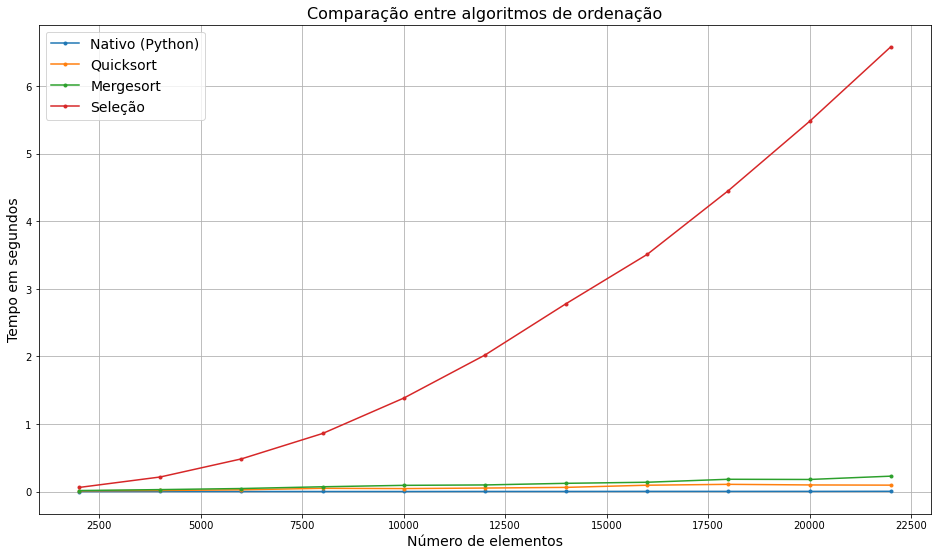

In [3]:
plt.figure(figsize=(16, 9))
plt.plot(df, marker='.')
plt.title('Comparação entre algoritmos de ordenação', size=16)
plt.legend(('Nativo (Python)', 'Quicksort', 'Mergesort', 'Seleção'), fontsize=14)
plt.xlabel('Número de elementos', size=14)
plt.ylabel('Tempo em segundos', size=14)
plt.grid()
plt.show()